### 2.1 Clustering tendency in the cow data

Learning goal: Evaluating clustering tendency

This task continues Exercise task 1.1. In file cowdist.csv (link on MyCourses), you can find pairwise Euclidean, Goodall and combined distances between the cows. Now you should evaluate the clustering tendency, if you were using only numerical, only categorical, or all features (assuming the above mentioned distance measures).

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

(a) Evaluate the clustering tendency visually for all three cases: 

- (i) only numerical
- (ii) only categorical, or 
- (iii) all features. 

In each case, discretize the distances into 5 equi-width bins whose ranges are [$b_1$, $e_1$[,..., [$b_5$, $e_5$[ for suitable $b_i$, $e_i$. Plot the histogram (i.e., frequencies of distances in each bin) and evaluate it visually, if it is suggesting a clustering structure.

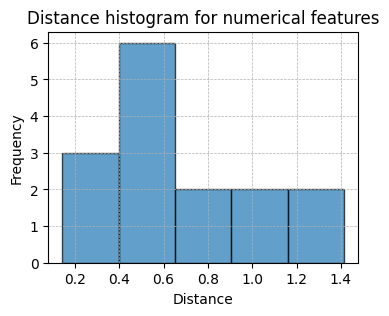

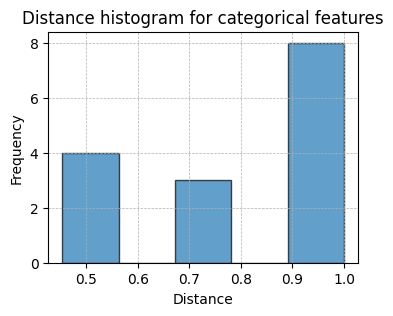

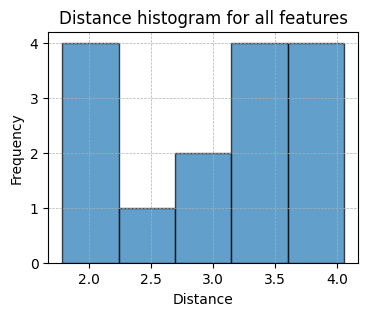

In [3]:
df = pd.read_csv('cowdist.csv')

# Define the columns for each case
columns = {
    'numerical features': 'L2',
    'categorical features': 'dGO',
    'all features': 'comb'
}

for title, column in columns.items():
    plt.figure(figsize=(4, 3))
    plt.hist(df[column], bins=5, edgecolor='black', alpha=0.7)
    plt.title(f'Distance histogram for {title}')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.grid(linestyle='--', linewidth=0.5)
    plt.show()

(b) Use the same discretization as in (a), but this time evaluate the clustering tendency with the entropy of the distance distribution. (This is described in Aggarwal Sec. 6.2.1.3 and as Approach 2 in the slides of lecture 3.) Calculate entropies for the three cases (numerical, categorical, combined).

In [4]:
df = pd.read_csv('cowdist.csv')

# Define the columns for each case
columns = {
    'numerical features': 'L2',
    'categorical features': 'dGO',
    'all features': 'comb'
}

# Function to calculate entropy
def calculate_entropy(column):
    # Discretize the distances into 5 equi-width bins
    bin_counts, bin_edges = np.histogram(column, bins=5)
    print(column.name)
    print(f"Bin counts: {bin_counts}")
    print(f"Bin edges: {bin_edges}")
    # Calculate probabilities
    probabilities = bin_counts / len(column)
    # Calculate entropy. Note: log(0) is undefined. Also, log base is 2 in entropy 
    entropy = -np.sum([pi * np.log2(pi) + (1 - pi) * np.log2(1 - pi) for pi in probabilities if pi > 0])
    return entropy

# Calculate entropies for each case
entropies = {title: calculate_entropy(df[column]) for title, column in columns.items()}

print()
# Print the results
for title, entropy in entropies.items():
    print(f'Entropy for {title}: {entropy:.4f}')


L2
Bin counts: [3 6 2 2 2]
Bin edges: [0.1429  0.39716 0.65142 0.90568 1.15994 1.4142 ]
dGO
Bin counts: [4 0 3 0 8]
Bin edges: [0.4537  0.56296 0.67222 0.78148 0.89074 1.     ]
comb
Bin counts: [4 1 2 4 4]
Bin edges: [1.7881  2.24136 2.69462 3.14788 3.60114 4.0544 ]

Entropy for numerical features: 3.3924
Entropy for categorical features: 2.5554
Entropy for all features: 3.4298


c) For comparison, calculate the entropy of uniform distance distribution,
where distances are discretized into five bins. Then interpret your
results in b). Which features are suggesting a clustering tendency (if
any)?

Interpretation:

Entropy measures the uncertainty or randomness in the data. A higher entropy value indicates a more uniform distribution of distances, suggesting a lack of clear clustering structure. A lower entropy value indicates that the distances are concentrated in specific bins, suggesting a potential clustering structure.

In [7]:
uniform_dist = np.random.uniform(0, 1, 1000)
bin_counts, bin_edges = np.histogram(uniform_dist, bins=5)
# Calculate probabilities
print(f"Bin counts: {bin_counts}")
print(f"Bin edges: {bin_edges}")
probabilities = bin_counts / len(uniform_dist)
# Calculate entropy. Note: log(0) is undefined. Also, log base is 2 in entropy 
print(probabilities)
entropy = -np.sum([pi * np.log2(pi) + (1 - pi) * np.log2(1 - pi) for pi in probabilities if pi > 0])

print("The entropy of a uniform distribution is:")
print(entropy)

Bin counts: [195 178 209 199 219]
Bin edges: [7.75705265e-04 1.99931191e-01 3.99086677e-01 5.98242162e-01
 7.97397648e-01 9.96553133e-01]
[0.195 0.178 0.209 0.199 0.219]
The entropy of a uniform distribution is:
3.605324684752317


The categorical features have the lowest entropy value, suggesting that they are suggesting a clustering tendency in the cow's data. 